In [2]:
# Cellule 1 : Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("✓ Bibliothèques importées avec succès!")

✓ Bibliothèques importées avec succès!


In [3]:
# Cellule 2 : Fonctions des 4 algorithmes

def fcfs_simple(processus):
    """FCFS - First Come First Served (Sans préemption)"""
    procs_tries = sorted(processus, key=lambda x: x['arrivee'])
    temps_courant = 0
    resultats = []
    gantt = []
    
    for p in procs_tries:
        debut = max(temps_courant, p['arrivee'])
        fin = debut + p['execution']
        sejour = fin - p['arrivee']
        attente = sejour - p['execution']
        reponse = debut - p['arrivee']
        
        resultats.append({
            'id': p['id'], 'arrivee': p['arrivee'], 'execution': p['execution'],
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
        gantt.append({'id': p['id'], 'debut': debut, 'fin': fin})
        temps_courant = fin
    
    return resultats, gantt


def round_robin(processus, quantum):
    """Round Robin - FCFS avec préemption"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    file_attente = []
    execution_restante = {p['id']: p['execution'] for p in processus_tries}
    temps_debut = {p['id']: None for p in processus_tries}
    temps_fin = {}
    gantt = []
    
    i = 0
    processus_actuel = None
    temps_dans_quantum = 0
    
    while execution_restante or file_attente or processus_actuel:
        while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
            file_attente.append(processus_tries[i]['id'])
            i += 1
        
        if processus_actuel is None and file_attente:
            processus_actuel = file_attente.pop(0)
            temps_dans_quantum = 0
            
            if temps_debut[processus_actuel] is None:
                temps_debut[processus_actuel] = temps_courant
        
        if processus_actuel:
            if not gantt or gantt[-1]['id'] != processus_actuel:
                gantt.append({'id': processus_actuel, 'debut': temps_courant, 'duree': 1})
            else:
                gantt[-1]['duree'] += 1
            
            execution_restante[processus_actuel] -= 1
            temps_dans_quantum += 1
            temps_courant += 1
            
            if execution_restante[processus_actuel] == 0:
                temps_fin[processus_actuel] = temps_courant
                del execution_restante[processus_actuel]
                processus_actuel = None
            elif temps_dans_quantum >= quantum:
                while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
                    file_attente.append(processus_tries[i]['id'])
                    i += 1
                
                file_attente.append(processus_actuel)
                processus_actuel = None
        else:
            temps_courant += 1
    
    resultats = []
    for proc in processus_tries:
        arrivee = proc['arrivee']
        execution = proc['execution']
        fin = temps_fin[proc['id']]
        sejour = fin - arrivee
        attente = sejour - execution
        reponse = temps_debut[proc['id']] - arrivee
        
        resultats.append({
            'id': proc['id'], 'arrivee': arrivee, 'execution': execution,
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
    
    return resultats, gantt


def sjf_non_preemptif(processus):
    """SJF - Shortest Job First (Sans préemption)"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    resultats = []
    processus_restants = processus_tries.copy()
    gantt = []
    
    while processus_restants:
        disponibles = [p for p in processus_restants if p['arrivee'] <= temps_courant]
        
        if not disponibles:
            temps_courant = processus_restants[0]['arrivee']
            continue
        
        proc_selectionne = min(disponibles, key=lambda x: x['execution'])
        
        temps_debut = temps_courant
        temps_fin = temps_debut + proc_selectionne['execution']
        
        sejour = temps_fin - proc_selectionne['arrivee']
        attente = sejour - proc_selectionne['execution']
        reponse = temps_debut - proc_selectionne['arrivee']
        
        resultats.append({
            'id': proc_selectionne['id'], 'arrivee': proc_selectionne['arrivee'],
            'execution': proc_selectionne['execution'], 'debut': temps_debut,
            'fin': temps_fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
        
        gantt.append({'id': proc_selectionne['id'], 'debut': temps_debut, 'fin': temps_fin})
        
        temps_courant = temps_fin
        processus_restants.remove(proc_selectionne)
    
    return resultats, gantt


def srt_preemptif(processus):
    """SRT - Shortest Remaining Time (Avec préemption)"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    execution_restante = {p['id']: p['execution'] for p in processus_tries}
    temps_debut = {p['id']: None for p in processus_tries}
    temps_fin = {}
    gantt = []
    
    i = 0
    processus_disponibles = []
    
    while execution_restante or processus_disponibles:
        while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
            processus_disponibles.append(processus_tries[i]['id'])
            i += 1
        
        processus_disponibles = [p for p in processus_disponibles if p in execution_restante]
        
        if processus_disponibles:
            proc_selectionne = min(processus_disponibles, key=lambda x: execution_restante[x])
            
            if temps_debut[proc_selectionne] is None:
                temps_debut[proc_selectionne] = temps_courant
            
            if not gantt or gantt[-1]['id'] != proc_selectionne:
                gantt.append({'id': proc_selectionne, 'debut': temps_courant, 'duree': 1})
            else:
                gantt[-1]['duree'] += 1
            
            execution_restante[proc_selectionne] -= 1
            temps_courant += 1
            
            if execution_restante[proc_selectionne] == 0:
                temps_fin[proc_selectionne] = temps_courant
                del execution_restante[proc_selectionne]
                processus_disponibles.remove(proc_selectionne)
        else:
            temps_courant += 1
    
    resultats = []
    for proc in processus_tries:
        arrivee = proc['arrivee']
        execution = proc['execution']
        fin = temps_fin[proc['id']]
        sejour = fin - arrivee
        attente = sejour - execution
        reponse = temps_debut[proc['id']] - arrivee
        
        resultats.append({
            'id': proc['id'], 'arrivee': arrivee, 'execution': execution,
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
    
    return resultats, gantt

print("✓ Les 4 algorithmes sont définis!")

✓ Les 4 algorithmes sont définis!


In [4]:
# Cellule 3 : Fonctions pour afficher les résultats

def afficher_gantt(gantt, titre):
    """Affiche le diagramme de Gantt"""
    fig, ax = plt.subplots(figsize=(14, 4))
    couleurs = plt.cm.Set3.colors
    
    processus_uniques = list(set([g['id'] for g in gantt]))
    couleur_map = {p: couleurs[i % len(couleurs)] for i, p in enumerate(processus_uniques)}
    
    for g in gantt:
        if 'duree' in g:
            duree = g['duree']
            fin = g['debut'] + duree
        else:
            fin = g['fin']
            duree = fin - g['debut']
        
        ax.barh(0, duree, left=g['debut'], height=0.5,
                color=couleur_map[g['id']], edgecolor='black', linewidth=1.5)
        
        centre = g['debut'] + duree / 2
        ax.text(centre, 0, g['id'], ha='center', va='center', 
                fontweight='bold', fontsize=10)
    
    # Ajouter les temps sur l'axe
    temps_uniques = set()
    for g in gantt:
        temps_uniques.add(g['debut'])
        if 'duree' in g:
            temps_uniques.add(g['debut'] + g['duree'])
        else:
            temps_uniques.add(g['fin'])
    
    for t in sorted(temps_uniques):
        ax.axvline(x=t, color='gray', linestyle=':', alpha=0.5)
        ax.text(t, -0.35, f"{t:.0f}", ha='center', fontsize=9)
    
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlim(0, max([g.get('fin', g['debut'] + g.get('duree', 0)) for g in gantt]) + 1)
    ax.set_xlabel('Temps (secondes)', fontsize=12, fontweight='bold')
    ax.set_yticks([])
    ax.set_title(f'Diagramme de Gantt - {titre}', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def afficher_tableau(resultats, titre):
    """Affiche le tableau des résultats"""
    df = pd.DataFrame([{
        'Processus': r['id'],
        'Arrivée': f"{r['arrivee']:.1f}",
        'Exécution': f"{r['execution']:.1f}",
        'Fin': f"{r['fin']:.1f}",
        'Séjour': f"{r['sejour']:.1f}",
        'Attente': f"{r['attente']:.1f}",
        'Réponse': f"{r['reponse']:.1f}"
    } for r in resultats])
    
    print(f"\n{'='*90}")
    print(f"{titre:^90}")
    print(f"{'='*90}")
    print(df.to_string(index=False))
    
    n = len(resultats)
    attente_moy = sum([r['attente'] for r in resultats]) / n
    reponse_moy = sum([r['reponse'] for r in resultats]) / n
    sejour_moy = sum([r['sejour'] for r in resultats]) / n
    
    print(f"{'='*90}")
    print(f"  Temps d'attente moyen : {attente_moy:.2f}s")
    print(f"  Temps de réponse moyen: {reponse_moy:.2f}s")
    print(f"  Temps de séjour moyen : {sejour_moy:.2f}s")
    print(f"{'='*90}\n")
    
    return {'attente': attente_moy, 'reponse': reponse_moy, 'sejour': sejour_moy}

print("✓ Fonctions d'affichage prêtes!")

✓ Fonctions d'affichage prêtes!


In [6]:
# Cellule 4 (Alternative) : SAISIE INTERACTIVE

def saisir_processus():
    n = int(input("Combien de processus ? "))
    processus = []
    
    for i in range(n):
        print(f"\n--- Processus P{i+1} ---")
        arrivee = float(input("Temps d'arrivée (s) : "))
        execution = float(input("Temps d'exécution (s) : "))
        processus.append({'id': f'P{i+1}', 'arrivee': arrivee, 'execution': execution})
    
    return processus

mes_processus = saisir_processus()
print("\n✓ Données enregistrées!")


Combien de processus ?  5



--- Processus P1 ---


Temps d'arrivée (s) :  5
Temps d'exécution (s) :  2



--- Processus P2 ---


Temps d'arrivée (s) :  3
Temps d'exécution (s) :  6



--- Processus P3 ---


Temps d'arrivée (s) :  1
Temps d'exécution (s) :  3



--- Processus P4 ---


Temps d'arrivée (s) :  2
Temps d'exécution (s) :  6



--- Processus P5 ---


Temps d'arrivée (s) :  2
Temps d'exécution (s) :  10



✓ Données enregistrées!



🎯 Algorithme : Round Robin (Quantum = 2)



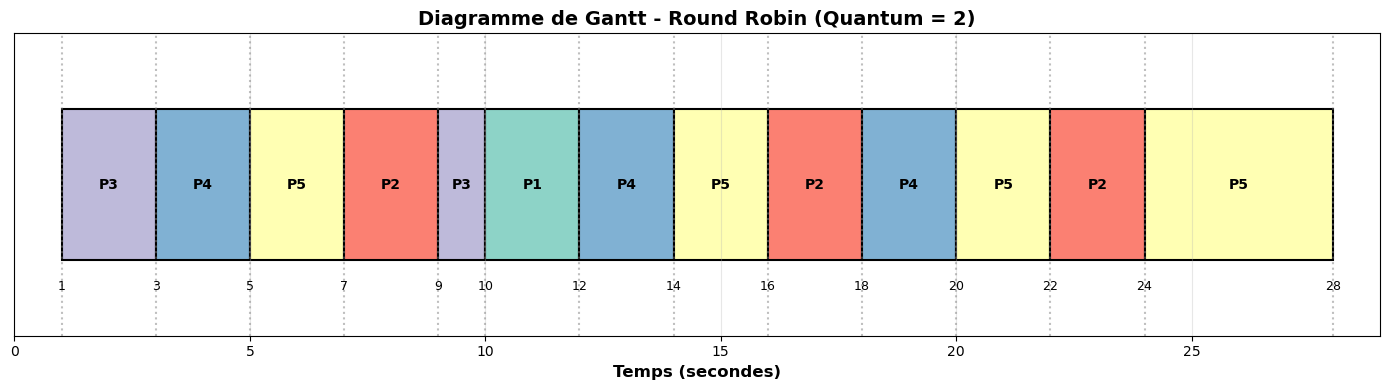


                                Round Robin (Quantum = 2)                                 
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P3     1.0       3.0 10.0    9.0     6.0     0.0
       P4     2.0       6.0 20.0   18.0    12.0     1.0
       P5     2.0      10.0 28.0   26.0    16.0     3.0
       P2     3.0       6.0 24.0   21.0    15.0     4.0
       P1     5.0       2.0 12.0    7.0     5.0     5.0
  Temps d'attente moyen : 10.80s
  Temps de réponse moyen: 2.60s
  Temps de séjour moyen : 16.20s



In [8]:
# Cellule 5 : TESTER UN SEUL ALGORITHME

# Choisissez l'algorithme à tester (décommentez une ligne)

# Option 1 : FCFS
#resultats, gantt = fcfs_simple(mes_processus)
#titre = "FCFS (First Come First Served)"

#Option 2 : Round Robin (décommentez les 3 lignes ci-dessous)
quantum = 2  # Modifiez le quantum ici
resultats, gantt = round_robin(mes_processus, quantum)
titre = f"Round Robin (Quantum = {quantum})"

# Option 3 : SJF (décommentez les 2 lignes ci-dessous)
# resultats, gantt = sjf_non_preemptif(mes_processus)
# titre = "SJF (Shortest Job First)"

# Option 4 : SRT (décommentez les 2 lignes ci-dessous)
# resultats, gantt = srt_preemptif(mes_processus)
# titre = "SRT (Shortest Remaining Time)"

# Afficher les résultats
print(f"\n🎯 Algorithme : {titre}\n")
afficher_gantt(gantt, titre)
stats = afficher_tableau(resultats, titre)


🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
                    COMPARAISON DE TOUS LES ALGORITHMES
🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥

🔄 Exécution des algorithmes...

1️⃣  FCFS (First Come First Served)


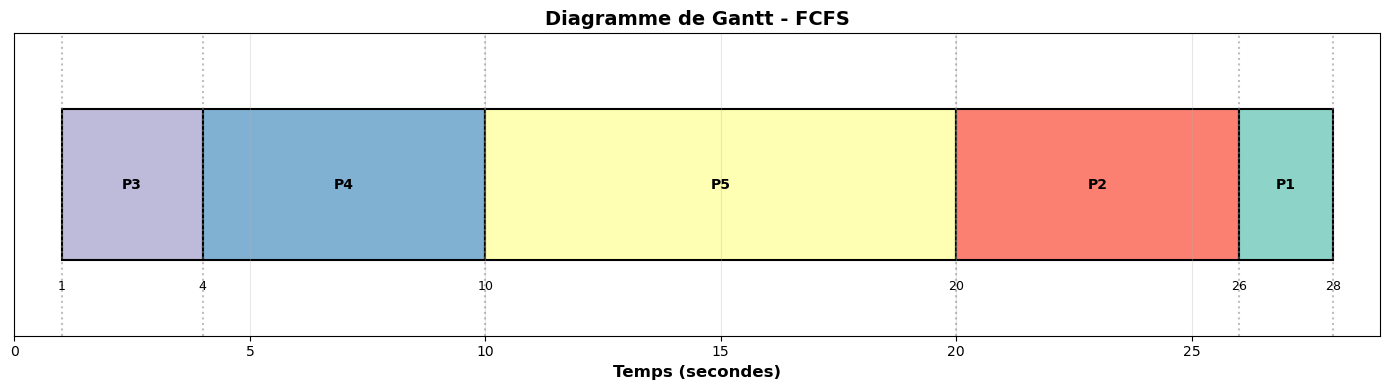


                                           FCFS                                           
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P3     1.0       3.0  4.0    3.0     0.0     0.0
       P4     2.0       6.0 10.0    8.0     2.0     2.0
       P5     2.0      10.0 20.0   18.0     8.0     8.0
       P2     3.0       6.0 26.0   23.0    17.0    17.0
       P1     5.0       2.0 28.0   23.0    21.0    21.0
  Temps d'attente moyen : 9.60s
  Temps de réponse moyen: 9.60s
  Temps de séjour moyen : 15.00s


2️⃣  Round Robin (Quantum = 2)


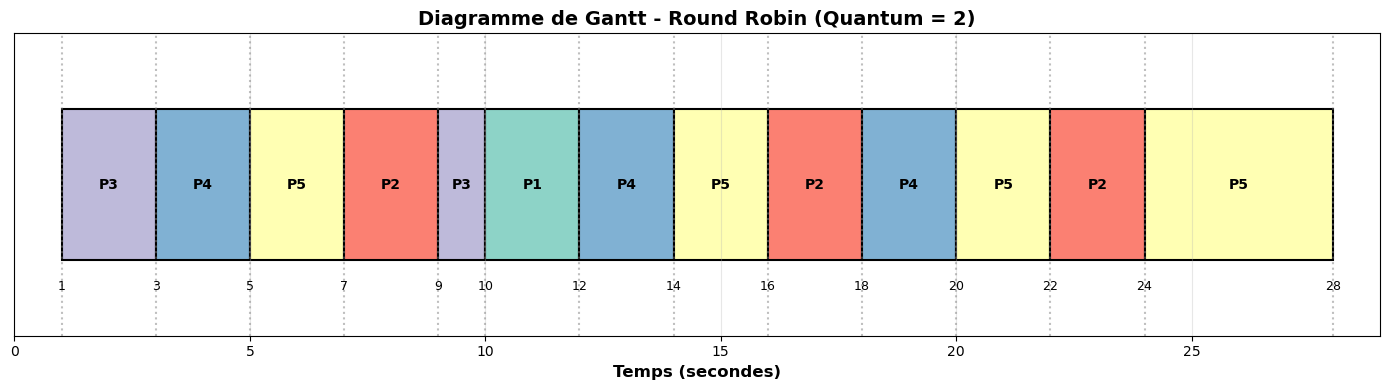


                                Round Robin (Quantum = 2)                                 
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P3     1.0       3.0 10.0    9.0     6.0     0.0
       P4     2.0       6.0 20.0   18.0    12.0     1.0
       P5     2.0      10.0 28.0   26.0    16.0     3.0
       P2     3.0       6.0 24.0   21.0    15.0     4.0
       P1     5.0       2.0 12.0    7.0     5.0     5.0
  Temps d'attente moyen : 10.80s
  Temps de réponse moyen: 2.60s
  Temps de séjour moyen : 16.20s


3️⃣  SJF (Shortest Job First)


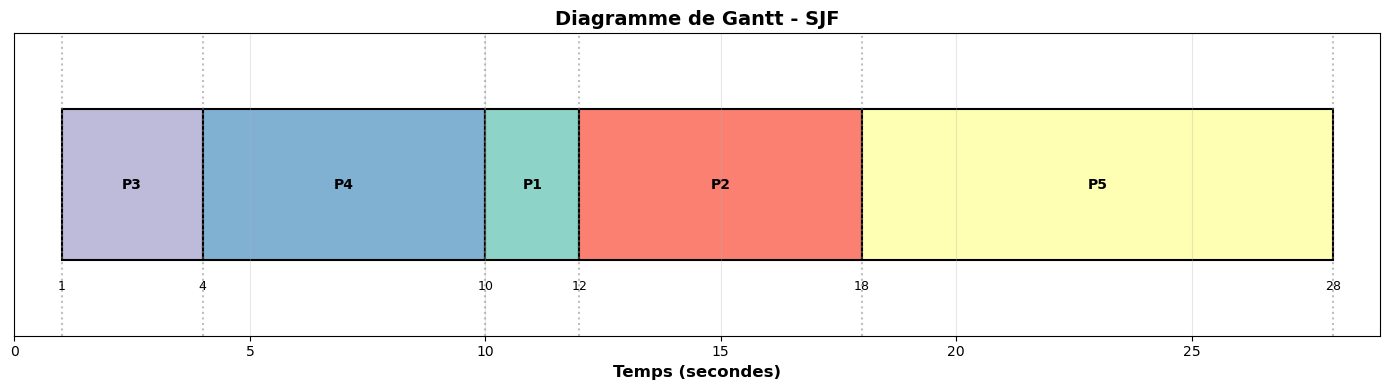


                                           SJF                                            
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P3     1.0       3.0  4.0    3.0     0.0     0.0
       P4     2.0       6.0 10.0    8.0     2.0     2.0
       P1     5.0       2.0 12.0    7.0     5.0     5.0
       P2     3.0       6.0 18.0   15.0     9.0     9.0
       P5     2.0      10.0 28.0   26.0    16.0    16.0
  Temps d'attente moyen : 6.40s
  Temps de réponse moyen: 6.40s
  Temps de séjour moyen : 11.80s


4️⃣  SRT (Shortest Remaining Time)


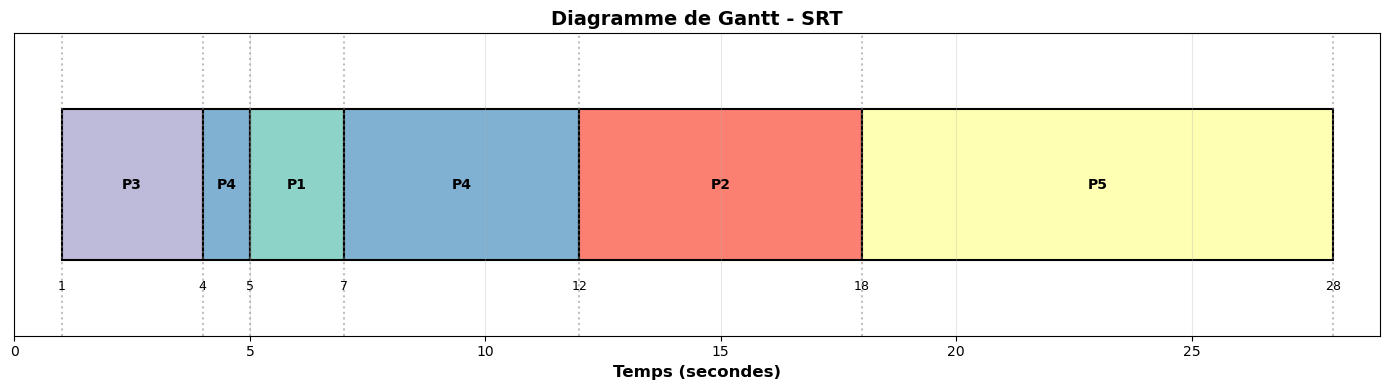


                                           SRT                                            
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P3     1.0       3.0  4.0    3.0     0.0     0.0
       P4     2.0       6.0 12.0   10.0     4.0     2.0
       P5     2.0      10.0 28.0   26.0    16.0    16.0
       P2     3.0       6.0 18.0   15.0     9.0     9.0
       P1     5.0       2.0  7.0    2.0     0.0     0.0
  Temps d'attente moyen : 5.80s
  Temps de réponse moyen: 5.40s
  Temps de séjour moyen : 11.20s



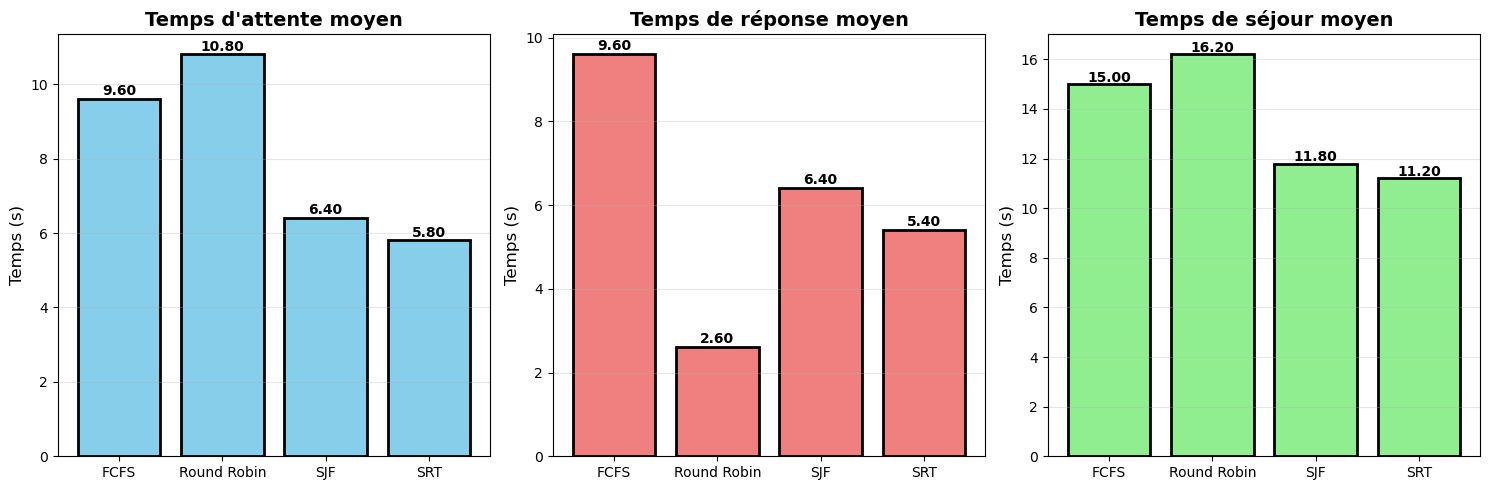


🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
                    🎖️  MEILLEURS ALGORITHMES
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
  🥇 Meilleur temps d'attente : SRT (5.80s)
  🥇 Meilleur temps de réponse : Round Robin (2.60s)
  🥇 Meilleur temps de séjour  : SRT (11.20s)
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆



In [9]:
# Cellule 6 : COMPARER TOUS LES ALGORITHMES

print("\n" + "🔥"*40)
print(" "*20 + "COMPARAISON DE TOUS LES ALGORITHMES")
print("🔥"*40 + "\n")

# Quantum pour Round Robin
quantum = 2

# Exécuter tous les algorithmes
print("🔄 Exécution des algorithmes...")
r_fcfs, g_fcfs = fcfs_simple(mes_processus)
r_rr, g_rr = round_robin(mes_processus, quantum)
r_sjf, g_sjf = sjf_non_preemptif(mes_processus)
r_srt, g_srt = srt_preemptif(mes_processus)

# Afficher les résultats de chaque algorithme
print("\n" + "="*90)
print("1️⃣  FCFS (First Come First Served)")
print("="*90)
afficher_gantt(g_fcfs, "FCFS")
s_fcfs = afficher_tableau(r_fcfs, "FCFS")

print("\n" + "="*90)
print(f"2️⃣  Round Robin (Quantum = {quantum})")
print("="*90)
afficher_gantt(g_rr, f"Round Robin (Quantum = {quantum})")
s_rr = afficher_tableau(r_rr, f"Round Robin (Quantum = {quantum})")

print("\n" + "="*90)
print("3️⃣  SJF (Shortest Job First)")
print("="*90)
afficher_gantt(g_sjf, "SJF")
s_sjf = afficher_tableau(r_sjf, "SJF")

print("\n" + "="*90)
print("4️⃣  SRT (Shortest Remaining Time)")
print("="*90)
afficher_gantt(g_srt, "SRT")
s_srt = afficher_tableau(r_srt, "SRT")

# Comparaison graphique
stats_all = [
    ('FCFS', s_fcfs),
    ('Round Robin', s_rr),
    ('SJF', s_sjf),
    ('SRT', s_srt)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
algos = [s[0] for s in stats_all]
attentes = [s[1]['attente'] for s in stats_all]
reponses = [s[1]['reponse'] for s in stats_all]
sejours = [s[1]['sejour'] for s in stats_all]

axes[0].bar(algos, attentes, color='skyblue', edgecolor='black', linewidth=2)
axes[0].set_title('Temps d\'attente moyen', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Temps (s)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(attentes):
    axes[0].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

axes[1].bar(algos, reponses, color='lightcoral', edgecolor='black', linewidth=2)
axes[1].set_title('Temps de réponse moyen', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Temps (s)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(reponses):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

axes[2].bar(algos, sejours, color='lightgreen', edgecolor='black', linewidth=2)
axes[2].set_title('Temps de séjour moyen', fontweight='bold', fontsize=14)
axes[2].set_ylabel('Temps (s)', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(sejours):
    axes[2].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Meilleurs algorithmes
meilleur_attente = min(stats_all, key=lambda x: x[1]['attente'])
meilleur_reponse = min(stats_all, key=lambda x: x[1]['reponse'])
meilleur_sejour = min(stats_all, key=lambda x: x[1]['sejour'])

print("\n" + "🏆"*40)
print("                    🎖️  MEILLEURS ALGORITHMES")
print("🏆"*40)
print(f"  🥇 Meilleur temps d'attente : {meilleur_attente[0]} ({meilleur_attente[1]['attente']:.2f}s)")
print(f"  🥇 Meilleur temps de réponse : {meilleur_reponse[0]} ({meilleur_reponse[1]['reponse']:.2f}s)")
print(f"  🥇 Meilleur temps de séjour  : {meilleur_sejour[0]} ({meilleur_sejour[1]['sejour']:.2f}s)")
print("🏆"*40 + "\n")